task 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

file_path = 'heart_disease.csv'
df = pd.read_csv(file_path)

print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())


Shape: (920, 15)

First 5 rows:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   0   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   1   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   2   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   3   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   4   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca               thal  
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0       fixed defect  
1  lv hypertrophy   108.0   True      1.5         flat  3.0             normal  
2  lv hypertrophy   129.0   True      2.6         flat  2.0  reversable defect  
3          normal   187.0  False      3.5  downsloping  0.0             normal  
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0             normal  

Data types:
id            int64
age 


Handling missing values...

Removed 0 duplicate rows

=== Numerical Features Statistics ===
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   459.500000   53.510870  131.995652  199.875000  137.668478    0.853261   
std    265.725422    9.424685   18.451300  109.028226   25.122981    1.058049   
min      0.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    229.750000   47.000000  120.000000  177.750000  120.000000    0.000000   
50%    459.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    689.250000   60.000000  140.000000  267.000000  155.250000    1.500000   
max    919.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca  
count  920.000000  
mean     0.234783  
std      0.632186  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      3.000000

<ipython-input-4-a5648bc7012c>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


<Figure size 1500x1000 with 0 Axes>

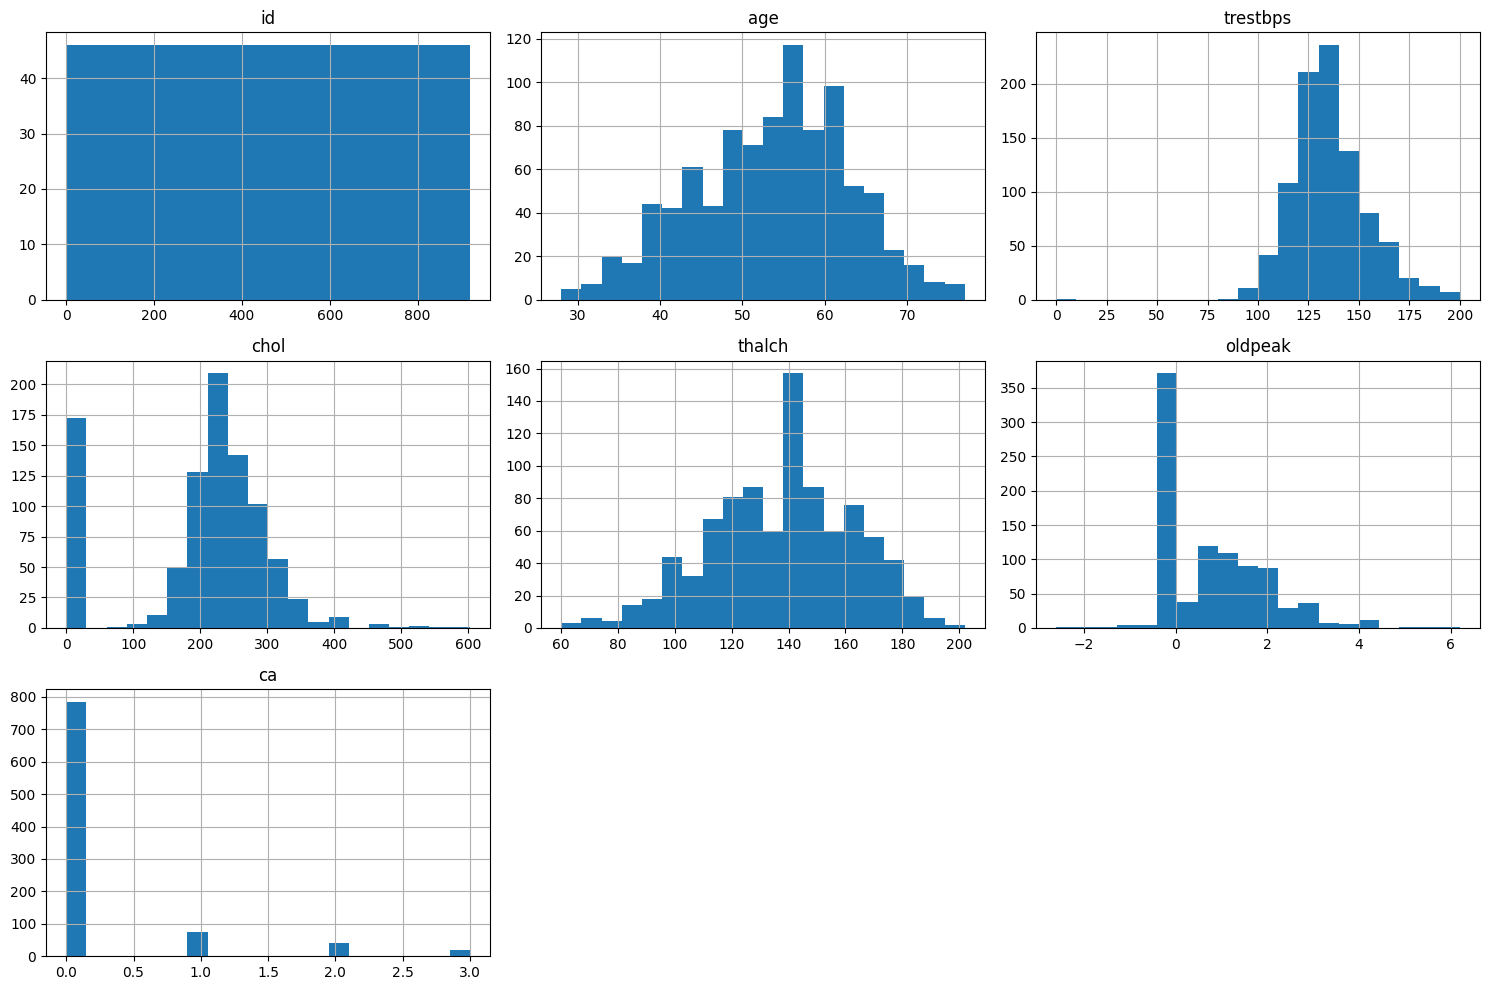

In [4]:
# 3. Data Cleaning
if df.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    num_cols = df.select_dtypes(include=np.number).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

initial_count = len(df)
df = df.drop_duplicates()
final_count = len(df)
print(f"\nRemoved {initial_count - final_count} duplicate rows")

# 4. Exploratory Data Analysis (EDA)
print("\n=== Numerical Features Statistics ===")
print(df.describe())

print("\n=== Categorical Features Distribution ===")
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\n{col} distribution:")
    print(df[col].value_counts(normalize=True))

plt.figure(figsize=(15, 10))
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [5]:
# 5. Data Preprocessing
print("\nEncoding categorical variables...")
df_encoded = pd.get_dummies(df, drop_first=True)

print("Scaling numerical features...")
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)



Encoding categorical variables...
Scaling numerical features...


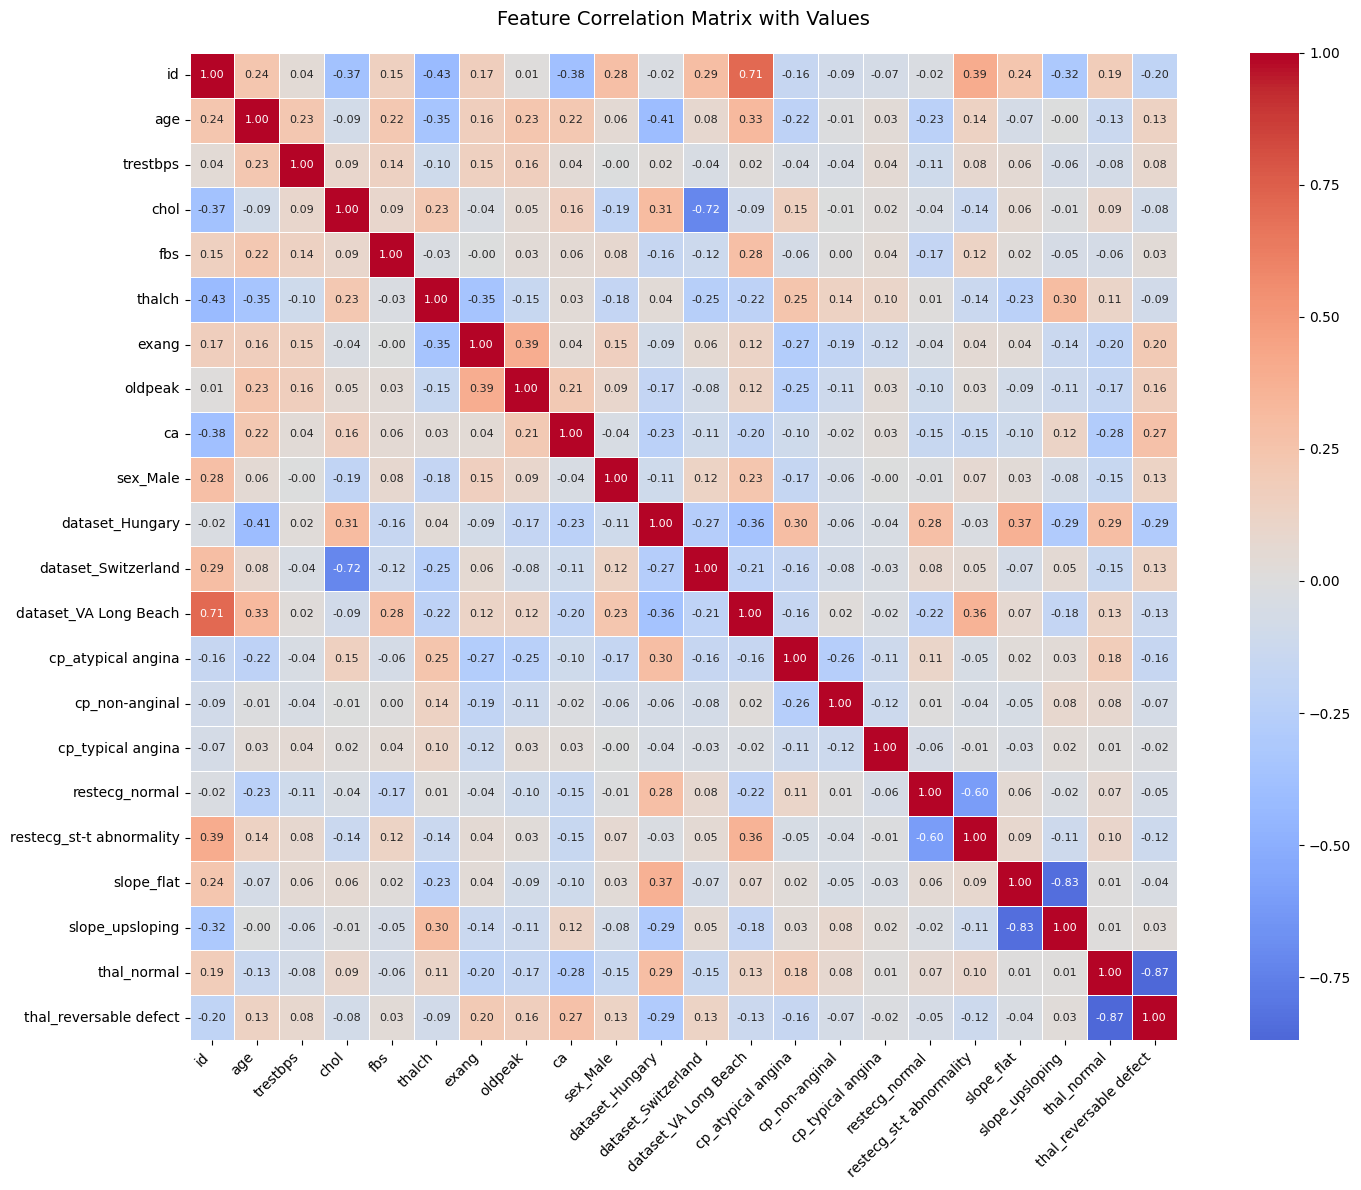

In [6]:
plt.figure(figsize=(16, 12))

corr_matrix = df_encoded.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    annot_kws={"size": 8},
    linewidths=0.5,
    square=True
)

plt.title('Feature Correlation Matrix with Values', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

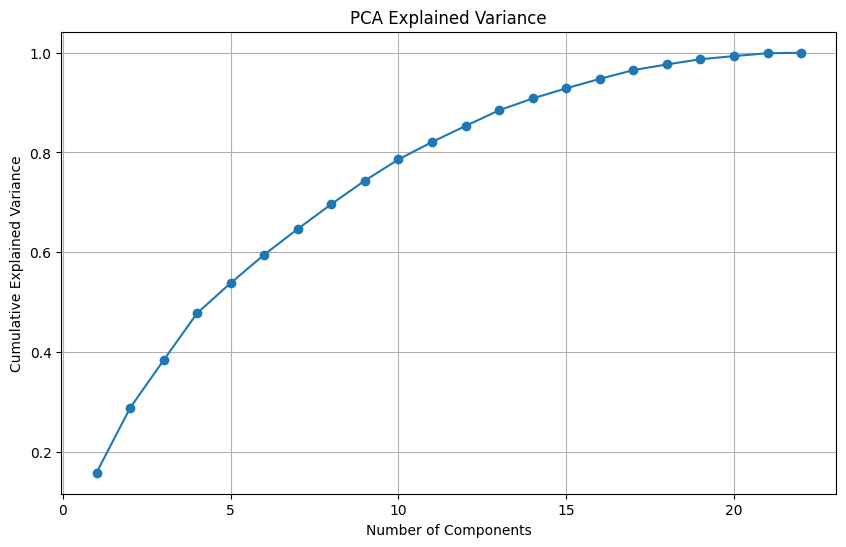

In [7]:
# 7. Dimensionality Reduction with PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

# Reduce to 2D
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(scaled_features)

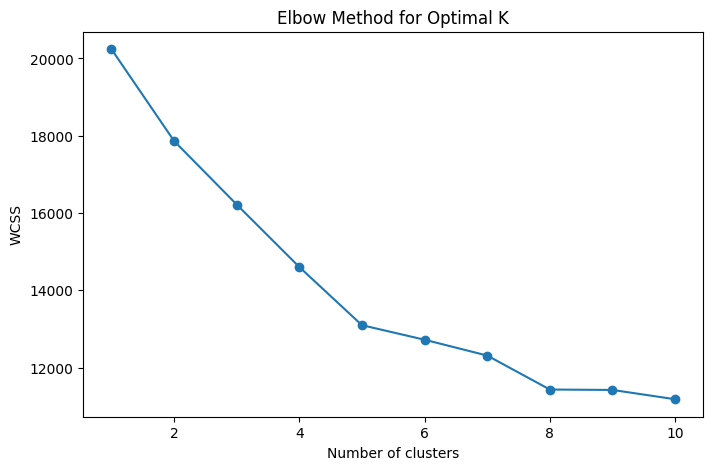

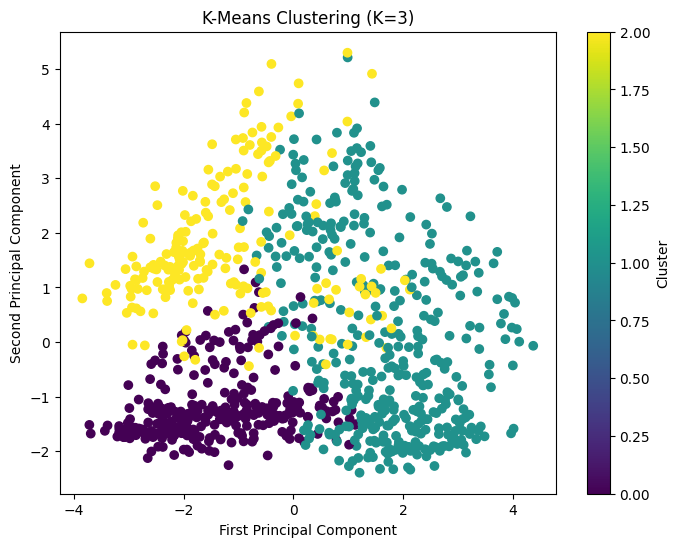

In [8]:
# 8. Clustering with K-Means

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1],
            c=kmeans_clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.colorbar(label='Cluster')
plt.show()


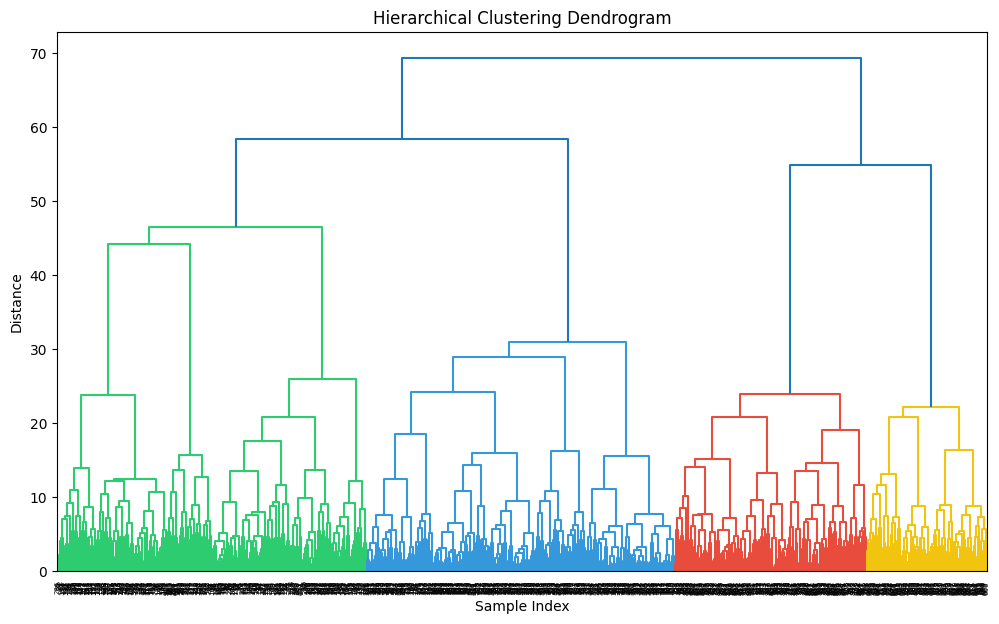

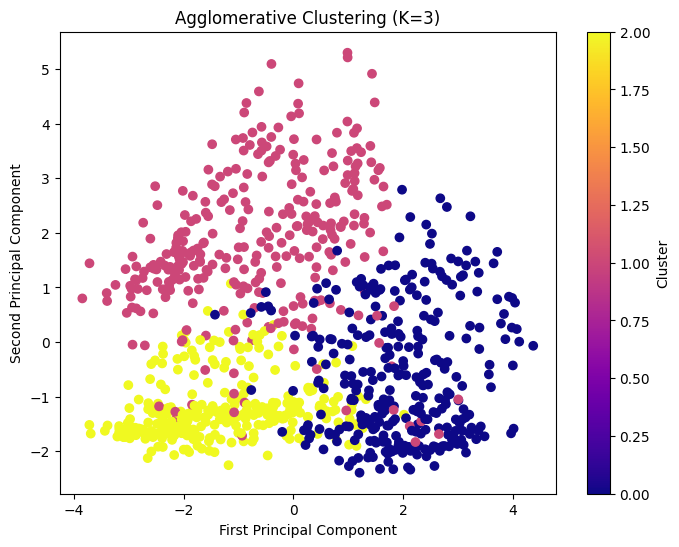

In [12]:
# 9. Agglomerative Clustering
# Dendrogram
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Apply clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_clusters = agg_clustering.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1],
            c=agg_clusters, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'Agglomerative Clustering (K={optimal_k})')
plt.colorbar(label='Cluster')
plt.show()

In [10]:
# 10. Cluster Evaluation
kmeans_score = silhouette_score(scaled_features, kmeans_clusters)
agg_score = silhouette_score(scaled_features, agg_clusters)

print("\n=== Clustering Performance ===")
print(f"K-Means Silhouette Score: {kmeans_score:.3f}")
print(f"Agglomerative Silhouette Score: {agg_score:.3f}")

if kmeans_score > agg_score:
    print("K-Means performed better based on Silhouette Score")
else:
    print("Agglomerative Clustering performed better based on Silhouette Score")

# 11. Save processed data with cluster labels
df['kmeans_cluster'] = kmeans_clusters
df['agg_cluster'] = agg_clusters
df.to_csv('heart_disease_clustered.csv', index=False)
print("\nProcessing complete. Results saved to 'heart_disease_clustered.csv'")


=== Clustering Performance ===
K-Means Silhouette Score: 0.128
Agglomerative Silhouette Score: 0.128
Agglomerative Clustering performed better based on Silhouette Score

Processing complete. Results saved to 'heart_disease_clustered.csv'
